<img src="kickstarter_header.PNG">

# The aim of this project is to find out, if there are any features, which will heavily influence the Kickstarter project to succeed or fail. 

Some characteristic of this dataset:

378661 rows, 15 columns


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
df_ks = pd.read_csv("ks_projects.csv")

df_ks.head(10)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [3]:
df_ks.groupby("main_category").nunique().count()

ID                  15
name                15
category            15
main_category       15
currency            15
deadline            15
goal                15
launched            15
pledged             15
state               15
backers             15
country             15
usd pledged         15
usd_pledged_real    15
usd_goal_real       15
dtype: int64

In [4]:
df_ks.groupby("category").nunique().count()

ID                  159
name                159
category            159
main_category       159
currency            159
deadline            159
goal                159
launched            159
pledged             159
state               159
backers             159
country             159
usd pledged         159
usd_pledged_real    159
usd_goal_real       159
dtype: int64

The dataset has 15 variables. Considering variables ID, name, currency, deadline date, launched date and country as self explanatory, details on other variables are as follow

**Main_Category**: There are 15 main categories for the project. These main categories broadly classify projects based on topic and genre they belong to.

**Category**: Main Categories are further sub divided in categories to give more general idea of the project. For example, Main Category “Technology” has 15 categories like Gadgets, Web, Apps, Software etc. There are 159 total categories.

**USD_Goal_Real**: This is the goal amount which the company need to raise to start its project. The goal amount is important variable for company as if it is too high, the project may fail to raise that amount of money and be unsuccessful. If it is too low, then it may reach its goal soon and backers may not be interested to pledge more.

**USD_Pledged_Real**: This is amount raised by the company through its backers. On Kickstarter, if total amount pledged is lower than goal, then the project is unsuccessful and the start-up company doesn’t receive any fund. If pledged amount is more than the goal, the company is considered successful. The variable “usd pledged” is amount of money raised in US dollars.

**Pledged**: Similar to USD_Pledged_Real but might be in different currencies depedning the origin of the country.

**Backers**: These are number of people who have supported the project by pledging some amount.


In [5]:
df_ks = df_ks.drop("ID", axis =1)

#ID cols is useless

In [6]:
df_ks = df_ks.drop("pledged", axis =1)

#this is the same as usd_pledged_real but in different currency. 

In [7]:
df_ks = df_ks.drop("usd pledged", axis =1)

# usd pledged is similar to usd_pledged_real 

In [8]:
df_ks["pledged_ratio"] = df_ks["usd_pledged_real"]/ df_ks["usd_goal_real"]

#assumption that the higher the ratio, the more likely it will succeed. 

In [9]:
df_ks.head()

,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,0.000000
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,0.080700
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,0.004889
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,0.000200
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00,0.065795


In [10]:
df_ks.isnull().sum()

#checking null

name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
pledged_ratio       0
dtype: int64

In [11]:
df_ks[df_ks.name.isnull()]

,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio
166851,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,failed,1,US,100.00,200000.00,0.000500
307234,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,failed,12,GB,316.05,3224.97,0.098001
309991,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,suspended,0,US,0.00,2500.00,0.000000
338931,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,failed,5,US,220.00,35000.00,0.006286


In [12]:
df_ks = df_ks.dropna()

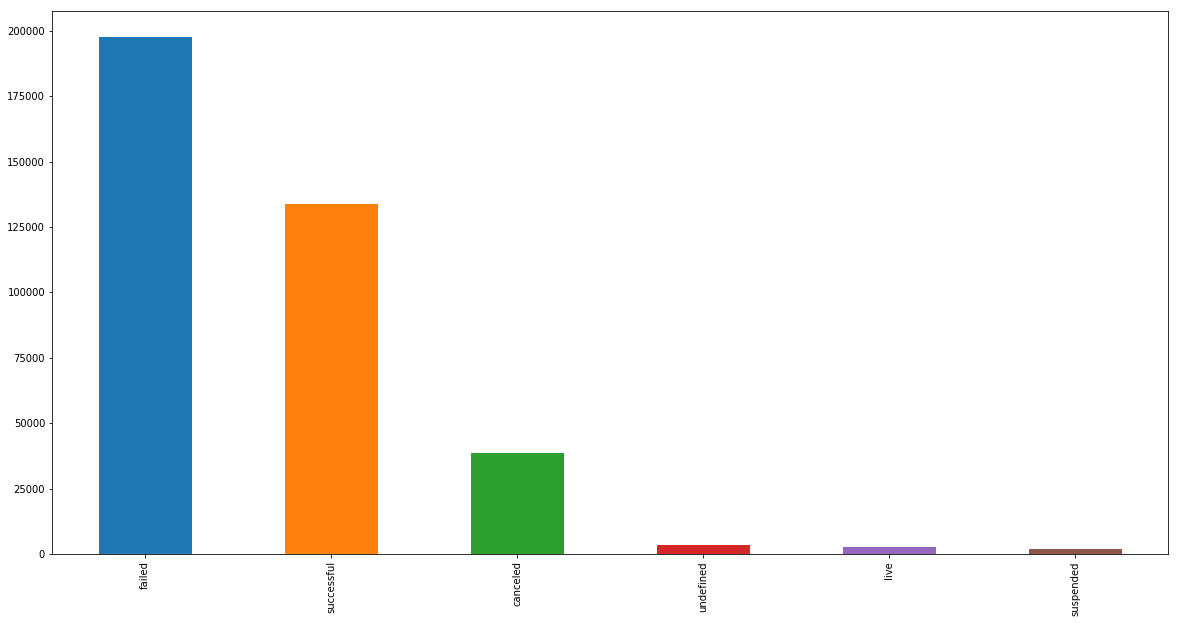

In [13]:
df_ks.state.value_counts().plot(figsize=(20,10), kind ="bar")

In [14]:
df_ks["state"] = df_ks["state"].replace(["canceled","undefined","suspended"], "failed")

df_ks.state.value_counts()


failed        241902
successful    133956
live            2799
Name: state, dtype: int64

In [15]:
df_ks.country.value_counts()

US      292624
GB       33671
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [16]:
df_ks.currency.value_counts()

USD    295362
GBP     34131
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [17]:
#replacing N,0" with country based on their respective currency
#Making the assumption that the country is based on the currency indicated 

In [18]:
df_ks[df_ks.country == 'N,0"']

,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio
169,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,failed,0,"N,0""",555.00,6500.00,0.085385
328,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,failed,0,"N,0""",3402.08,3211.53,1.059333
632,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,failed,0,"N,0""",3576.00,3500.00,1.021714
647,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,failed,0,"N,0""",7007.80,6000.00,1.167967
749,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,failed,0,"N,0""",3660.38,3000.00,1.220127
824,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,failed,0,"N,0""",4251.14,3572.39,1.189999
844,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,failed,0,"N,0""",6370.00,5000.00,1.274000
864,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,failed,0,"N,0""",6695.00,6000.00,1.115833
870,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,failed,0,"N,0""",2926.00,2750.00,1.064000
890,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,failed,0,"N,0""",1585.00,1200.00,1.320833


In [19]:
#for each row, check country
#if country = N,0" , check currency and replace value in country
#if country != N,0", pass

In [20]:
country_list = {"USD":"US", 
                "GBP":"GB", 
                "CAD":"CA", 
                "EUR":"EU", 
                "AUD":"AU",
                "SEK":"SE",
                "NZD":"NZ",
                "DKK":"DK",
                "NOK":"NO",
                "CHF":"CH"}

In [21]:
for i in df_ks.index:
    if df_ks.loc[i,"country"]== 'N,0"':
         df_ks.loc[i,"country"] = df_ks.loc[i,"currency"]


In [22]:
df_ks.country.value_counts()

US     292624
GB      33671
CA      14756
AU       7839
DE       4171
FR       2939
IT       2878
NL       2868
USD      2738
ES       2276
SE       1757
MX       1752
NZ       1447
DK       1113
IE        811
CH        761
NO        708
HK        618
BE        617
AT        597
SG        555
GBP       460
CAD       206
EUR       186
AUD       111
LU         62
JP         40
SEK        31
NZD        28
DKK        16
NOK        14
CHF         7
Name: country, dtype: int64

In [23]:
df_ks = df_ks.replace({"country":country_list})

df_ks.country.nunique()

23

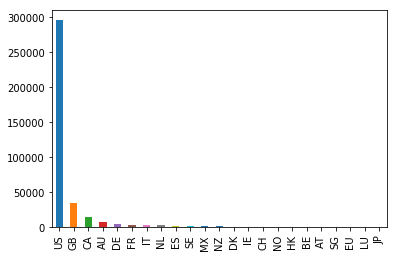

In [24]:
df_ks.country.value_counts().plot(kind="bar")

In [25]:
# calculating the percentage of success within each country

x = df_ks[df_ks.state == "successful"].groupby("country").count()

print (x)

           name  category  main_category  currency  deadline    goal  \
country                                                                
AT          107       107            107       107       107     107   
AU         2011      2011           2011      2011      2011    2011   
BE          152       152            152       152       152     152   
CA         4137      4137           4137      4137      4137    4137   
CH          187       187            187       187       187     187   
DE          937       937            937       937       937     937   
DK          362       362            362       362       362     362   
ES          492       492            492       492       492     492   
EU            4         4              4         4         4       4   
FR          908       908            908       908       908     908   
GB        12081     12081          12081     12081     12081   12081   
HK          216       216            216       216       216    

In [26]:
y = x.state

Text(0.5,1,'Percentage of Successful Kickstart Projects in each country')

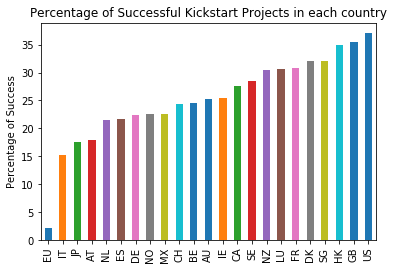

In [27]:
#calculating the percentage of successful project in each country to see if it make sense to categorize them into "others"

success_country = ((y / df_ks.country.value_counts())*100).sort_values()

success_country.plot(kind="bar")
plt.ylabel("Percentage of Success")
plt.title("Percentage of Successful Kickstart Projects in each country")

In [28]:
#I want to find out the duration of the project - taking launched date minus deadline

In [29]:
import datetime as dt

df_ks["launched"] = df_ks["launched"].astype('datetime64[ns]')

In [30]:
#To drop the timestamp 

df_ks["launched"] = df_ks["launched"].apply(lambda x: x.date())

df_ks["launched"] = df_ks["launched"].astype('datetime64[ns]')

In [31]:
df_ks.head()

#checking if the time has been dropped 

,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,failed,0,GB,0.0,1533.95,0.000000
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,failed,15,US,2421.0,30000.00,0.080700
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,failed,3,US,220.0,45000.00,0.004889
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,failed,1,US,1.0,5000.00,0.000200
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,failed,14,US,1283.0,19500.00,0.065795


In [32]:
df_ks["deadline"]=df_ks["deadline"].astype("datetime64[ns]")

#converting deadline into datetime

In [33]:
df_ks.dtypes

name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
state                       object
backers                      int64
country                     object
usd_pledged_real           float64
usd_goal_real              float64
pledged_ratio              float64
dtype: object

In [34]:
df_ks["duration"] = df_ks.deadline - df_ks.launched

df_ks.duration = df_ks.duration.dt.days

#calculating duration in term of days

In [35]:
from collections import Counter

df_ks['name_count'] = df_ks['name'].apply(lambda x: len(str(x).split(' ')))

df_ks.head()

#name might not be relevant but the length of the project might affect the likeability which impact the pledged amount

,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio,duration,name_count
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,failed,0,GB,0.0,1533.95,0.000000,59,6
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,failed,15,US,2421.0,30000.00,0.080700,60,8
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,failed,3,US,220.0,45000.00,0.004889,45,3
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,failed,1,US,1.0,5000.00,0.000200,30,7
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,failed,14,US,1283.0,19500.00,0.065795,56,8


In [36]:
df_ks = df_ks.drop("name", axis =1)

#dropping name column

In [37]:
df_ks["deadline_day"]= df_ks["deadline"].dt.dayofweek

#0 = Monday, 1 = Tuesday ...

In [38]:
df_ks['deadline_year'] = pd.DatetimeIndex(df_ks['deadline']).year
df_ks['deadline_month'] = pd.DatetimeIndex(df_ks['deadline']).month

In [39]:
df_ks.head()

,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio,duration,name_count,deadline_day,deadline_year,deadline_month
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,failed,0,GB,0.0,1533.95,0.000000,59,6,4,2015,10
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,failed,15,US,2421.0,30000.00,0.080700,60,8,2,2017,11
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,failed,3,US,220.0,45000.00,0.004889,45,3,1,2013,2
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17,failed,1,US,1.0,5000.00,0.000200,30,7,0,2012,4
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,failed,14,US,1283.0,19500.00,0.065795,56,8,5,2015,8


In [40]:
#Dropping "deadline" column after breaking down.
df_ks = df_ks.drop("deadline", axis =1)

In [41]:
df_ks["launched_day"]= df_ks["launched"].dt.dayofweek

In [42]:
df_ks["launched_year"] = pd.DatetimeIndex(df_ks["launched"]).year
df_ks["launched_month"] = pd.DatetimeIndex(df_ks["launched"]).month

In [43]:
df_ks = df_ks.drop(df_ks["launched_year"] = 1970,axis = 1)

SyntaxError: keyword can't be an expression (<ipython-input-43-66aafa94868a>, line 1)

In [ ]:
df_ks.head()

In [ ]:
#Dropping "Launched" column after breaking down.
df_ks = df_ks.drop("launched", axis =1)

In [ ]:
import seaborn as sns

fig, ax =plt.subplots(figsize=(10, 8))
ks_corr = df_ks.corr()
sns.heatmap(ks_corr, mask=np.zeros_like(ks_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
df_ks["launched_year"].value_counts().plot(kind="bar", x = "Year")


In [ ]:
#get_dummies

In [ ]:
# df2 = df_ks.drop(["name","currency","deadline","launched","backers"], axis =1)

In [ ]:
#Determine the most relevant 5 variables

In [ ]:
# decomposition = seasonal_decompose(bus.riders, freq=12)  
# fig = plt.figure()  
# fig = decomposition.plot()  
# fig.set_size_inches(12, 6)

#To help determine the trend or seasonality 

What are the common factors that would make a kickstarter project successful? Two class categories